<a href="https://colab.research.google.com/github/suchorsky/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but I'm going to simplify it: predicting a number! 


In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

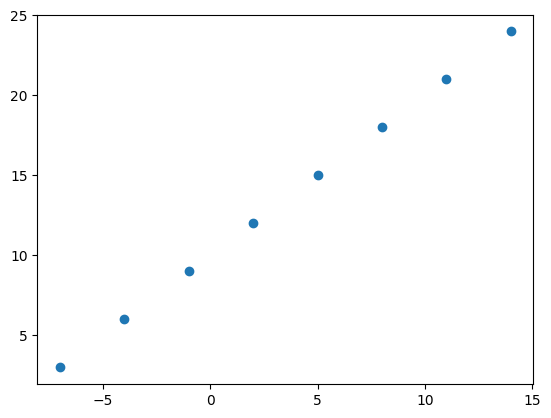

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features - independent variable
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels - dependent variable
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it

plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shape

In [ ]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Trurning numpy array intu tensor
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

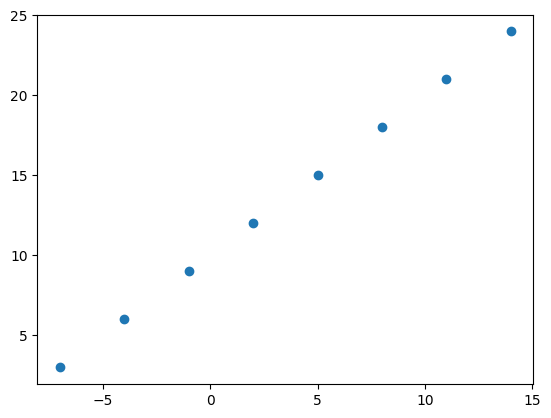

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

# it's a scaler

plt.scatter(X,y)

## Steps in modelling with TensorFlow

1.** Creating a model** - define the input and output layers and hidden layers for deep learning model
2. **Compiling the model** - define the loss function (the fucnction which tells model how wrong it is) and optimizer (tells model how to improve the patterns is learning) and evaluation metrics (what we can use to interpret the performance of model) 
3. **Fitting the model** - let model to find patterns in X and y (features and labels)

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss=tf.keras.losses.mae, # mea is a short form from mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochastic gredient descent) 
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.2201 - mae: 10.2201
Epoch 2/5
1/1 [==============================] - 0s 29ms/step - loss: 10.0876 - mae: 10.0876
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 9.9551 - mae: 9.9551
Epoch 4/5
1/1 [==============================] - 0s 26ms/step - loss: 9.8226 - mae: 9.8226
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 9.6901 - mae: 9.6901


In [ ]:
# Check out X, y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using our model
y_pred = model.predict([17.0])
y_pred

y_pred + 14

1/1 [==============================] - 0s 340ms/step


array([[32.95602]], dtype=float32)

## Improving our model

We can improve model, by alterning the steps we took to create a model

1. **Creating a model** - add more layers, so we increase the number of hidden units (more neurons) 
2. ** Compiling a model ** - change optimization function or perhaps the ** learning rate ** of the optimization function 
3. ** Fitting a model ** - here we could fit the model for a more ** epochs ** (iterations) or ad more data (give more examples to learn from)

In [ ]:
# Rebuild the model

#1 Create a model
model = tf.keras.Sequential((
    tf.keras.layers.Dense(1)
))

#2 Compile model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 19.4219 - mae: 19.4219
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 19.1407 - mae: 19.1407
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 18.8594 - mae: 18.8594
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 18.5782 - mae: 18.5782
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 18.2969 - mae: 18.2969
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 18.0157 - mae: 18.0157
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.7344 - mae: 17.7344
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 17.4532 - mae: 17.4532
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 17.1719 - mae: 17.1719
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 16.8907 - mae: 16.8907
Epoch 11/100
1/1 [==============================

In [ ]:
# Remin data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check if model prediction imporved
model.predict([17.0])

1/1 [==============================] - 0s 65ms/step


array([[29.570719]], dtype=float32)

In [ ]:
#Change model by adding different optimizer to our model and adding more layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 928ms/step - loss: 13.4191 - mae: 13.4191
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 12.6897 - mae: 12.6897
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9659 - mae: 11.9659
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2456 - mae: 11.2456
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5260 - mae: 10.5260
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8043 - mae: 9.8043
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0773 - mae: 9.0773
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3417 - mae: 8.3417
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5946 - mae: 7.5946
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8331 - mae: 6.8331
Epoch 11/100
1/1 [==============================] - 0s 11m

In [ ]:
# Remind data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check prediction
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[27.005785]], dtype=float32)

## Evaluting model
Common ways to improve a deep model:
*   Adding Layers
*   Increase the numbers of hidden units
*   Change the activation function 
*   Change the optimization function 
*   Change the learning rate
*   Fitting on more data
*   Fitting for longer


In practice, a typical workflow is:
``` 
Build a model
Fit it
Evaluate it
Tweak a model
Fit it
Evaluate it 
Tweak it
...
```

